<a href="https://colab.research.google.com/github/colawhite/abtesting/blob/master/multi_armed_bandit_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To estimate the probability of a binary outcome, we usually assume Beta distribution as prior probability distribution for the following two important properties:
1. Beta distribution is defined between 0 and 1, which correlates to the range of our estimators.
2. The posterior probability is still Beta distribution. If the outcome is success, alpha = alpha + 1; if the outcome is fail, then beta = beta + 1

In [0]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from operator import add

Use baseball as an example. Batting average (BA) is a metric to evaluate a player. Let's say we want to estimate the BA for a new player whose true BA is 30%. Since the new player does not have any batting history, we can assume the distribution of estimated BA follows beta(1,1), i.e. our estimate is equally distributed between 0 and 1. 

Text(0.5, 1.0, 'Initial')

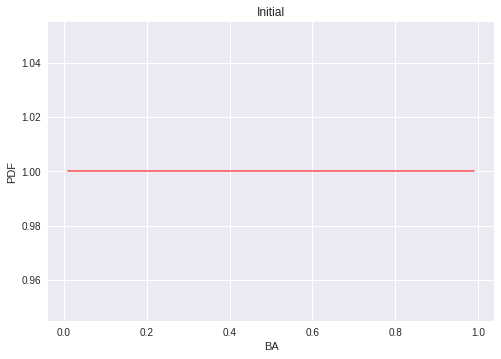

In [33]:
a,b = 1,1
np.random.seed = 3
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
mpl.style.use('seaborn')
fig, ax = plt.subplots(1, 1)
ax.plot(x, beta.pdf(x, a, b),'r-', alpha=0.6)
plt.xlabel('BA')
plt.ylabel('PDF')
plt.title('Initial')

With progress of games, we can collect more data and produce a better estimate of the player's BA. Using the property of beta, we can observe that the estimated BA is ~10% after 10 AB(At Bats), but is very close to the true 30% BA after 1000 AB.

Text(0.5, 1.0, 'After 10 AT BATS')

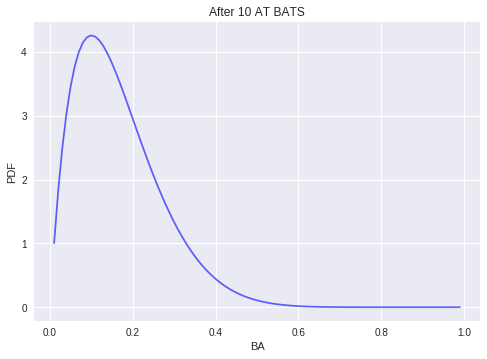

In [29]:
a,b = 1,1
for i in range(10):
    reward = np.random.binomial(1, 0.3)
    a += reward
    b += 1-reward

fig, ax = plt.subplots(1, 1)
ax.plot(x, beta.pdf(x, a, b),'b-', alpha=0.6)
plt.xlabel('BA')
plt.ylabel('PDF')
plt.title('After 10 AT BATS')

Text(0.5, 1.0, 'After 1000 AT BATS')

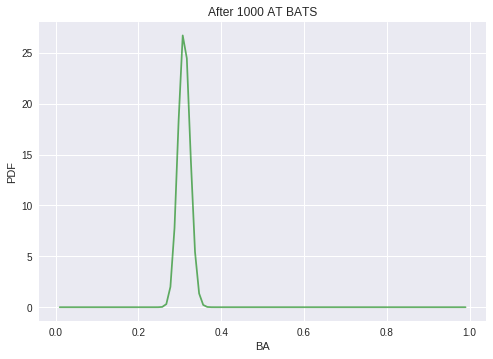

In [32]:
a,b = 1,1
for i in range(1000):
    reward = np.random.binomial(1, 0.3)
    a += reward
    b += 1-reward

fig, ax = plt.subplots(1, 1)
ax.plot(x, beta.pdf(x, a, b),'g-', alpha=0.6)
plt.xlabel('BA')
plt.ylabel('PDF')
plt.title('After 1000 AT BATS')